# Introduction:
We all watch and love movies. But what is the secret of the movie's success? Is it the actors, the director, the company that made the movie, or the budget? Is it possible to predict the success of the movie before its release?

In [1]:
setwd("C:/projet_R")

In [2]:
getwd()

[1] "C:/projet_R"

In [3]:
data=read.csv("movies.csv",sep=",",header=TRUE,stringsAsFactors=TRUE)

# Data Cleaning

In [4]:
str(data)

'data.frame':	7668 obs. of  15 variables:
 $ name    : Factor w/ 7512 levels "'71","'night, Mother",..: 6591 5575 5147 288 1027 2113 5576 4437 5286 6217 ...
 $ rating  : Factor w/ 13 levels "","Approved",..: 8 8 6 6 8 8 8 8 6 8 ...
 $ genre   : Factor w/ 19 levels "Action","Adventure",..: 7 2 1 5 5 11 1 4 1 4 ...
 $ year    : int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ released: Factor w/ 3415 levels "","1981 (United States)",..: 1707 1494 1773 1494 1545 2504 1773 701 1755 2288 ...
 $ score   : num  8.4 5.8 8.7 7.7 7.3 6.4 7.9 8.2 6.8 7 ...
 $ votes   : num  927000 65000 1200000 221000 108000 123000 188000 330000 101000 10000 ...
 $ director: Factor w/ 2949 levels "A.R. Murugadoss",..: 2595 2274 1117 1307 1060 2534 1419 1836 2313 2870 ...
 $ writer  : Factor w/ 4536 levels "","'Weird Al' Yankovic",..: 4026 1641 2578 2010 525 4371 841 1778 1989 427 ...
 $ star    : Factor w/ 2815 levels "","'Weird Al' Yankovic",..: 1050 331 1749 2251 414 245 1282 2245 881 591 ...
 $ co

In [5]:
# displays the first 10 rows of data
head(data, n = 10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5e+06,83453539,Paramount Pictures,88
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0e+06,39846344,Orion Pictures,98
6,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,5.5e+05,39754601,Paramount Pictures,95
7,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,2.7e+07,115229890,Universal Pictures,133
8,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,1.8e+07,23402427,Chartoff-Winkler Productions,129
9,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,5.4e+07,108185706,Dovemead Films,127


In [6]:
summary(data)

            name            rating           genre           year     
 Anna         :   3   R        :3697   Comedy   :2245   Min.   :1980  
 Fever Pitch  :   3   PG-13    :2112   Action   :1705   1st Qu.:1991  
 Hamlet       :   3   PG       :1252   Drama    :1518   Median :2000  
 Hercules     :   3   Not Rated: 283   Crime    : 551   Mean   :2000  
 Nobody's Fool:   3   G        : 153   Biography: 443   3rd Qu.:2010  
 Pulse        :   3            :  77   Adventure: 427   Max.   :2020  
 (Other)      :7650   (Other)  :  94   (Other)  : 779                 
                              released        score          votes        
 February 14, 1986 (United States):   9   Min.   :1.90   Min.   :      7  
 May 17, 2019 (United States)     :   9   1st Qu.:5.80   1st Qu.:   9100  
 October 4, 1991 (United States)  :   9   Median :6.50   Median :  33000  
 August 26, 2016 (United States)  :   8   Mean   :6.39   Mean   :  88109  
 August 9, 2019 (United States)   :   8   3rd Qu.:7.10   

In [7]:
colSums(is.na(data))

name   rating    genre     year released    score    votes director 
       0        0        0        0        0        3        3        0 
  writer     star  country   budget    gross  company  runtime 
       0        0        0     2171      189        0        4

In [8]:
# Drop any rows with missing values
data <- data[complete.cases(data), ]

In [9]:
colSums(is.na(data))

name   rating    genre     year released    score    votes director 
       0        0        0        0        0        0        0        0 
  writer     star  country   budget    gross  company  runtime 
       0        0        0        0        0        0        0

In [10]:
dim(data)

[1] 5435   15

In [11]:
#This command creates a new variable 'success' in the 'data' data frame.
# The new variable takes on a value of 1 if the value in the 'gross' column is greater than the value in the 'budget' column for a particular row, and 0 otherwise.
data$success <- ifelse(data$gross > data$budget, 1, 0)
table(data$success)/nrow(data)


        0         1 
0.3221711 0.6778289 

# Data Exploration

The dataset is unbalanced. We have more successful movies (67.8%) than not (32.2%).

In [12]:
#This command creates a new subset_data dataframe from the original 'data' dataframe, filtering only the rows where the 'success' column equals 1.
subset_data <- subset(data, success == 1)
#This command displays the first 5 rows of the 'subset_data' dataframe.
head(subset_data, n = 5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,success
,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
1,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.9e+07,46998772,Warner Bros.,146,1
2,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5e+06,58853106,Columbia Pictures,104,1
3,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.8e+07,538375067,Lucasfilm,124,1
4,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5e+06,83453539,Paramount Pictures,88,1
5,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0e+06,39846344,Orion Pictures,98,1


In [13]:
tapply(data$budget,data$success,summary)

$`0`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    50000  10000000  19000000  25297446  33050000 175000000 

$`1`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
6.00e+03 1.00e+07 2.50e+07 4.10e+07 5.20e+07 3.56e+08 


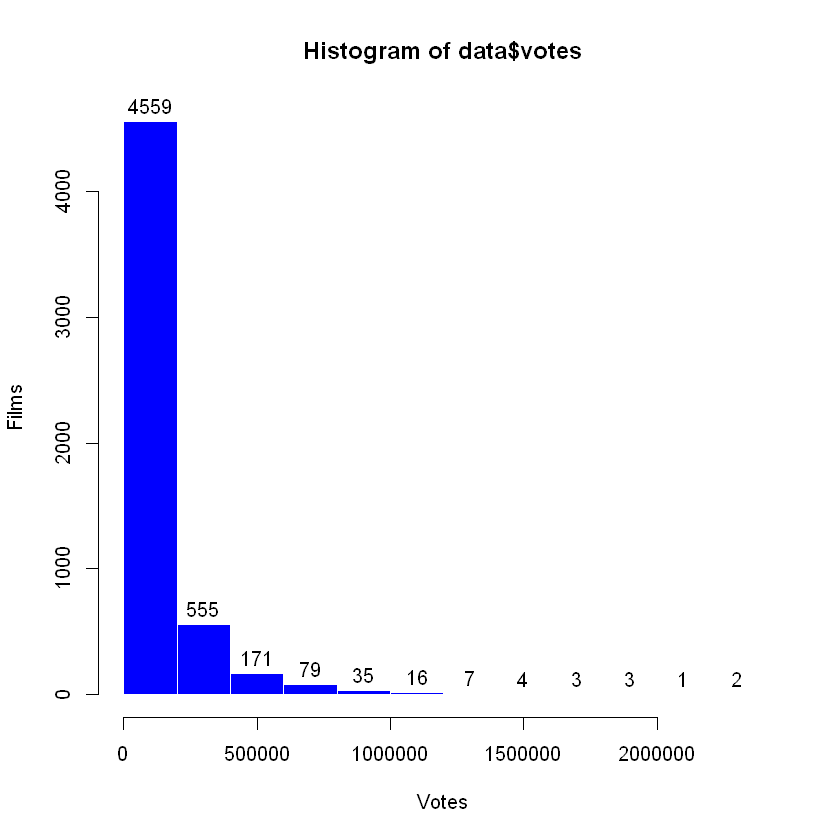

In [42]:
hist(data$votes, col = "blue", border = "white", labels = TRUE, xlab = "Votes", ylab = "Films")

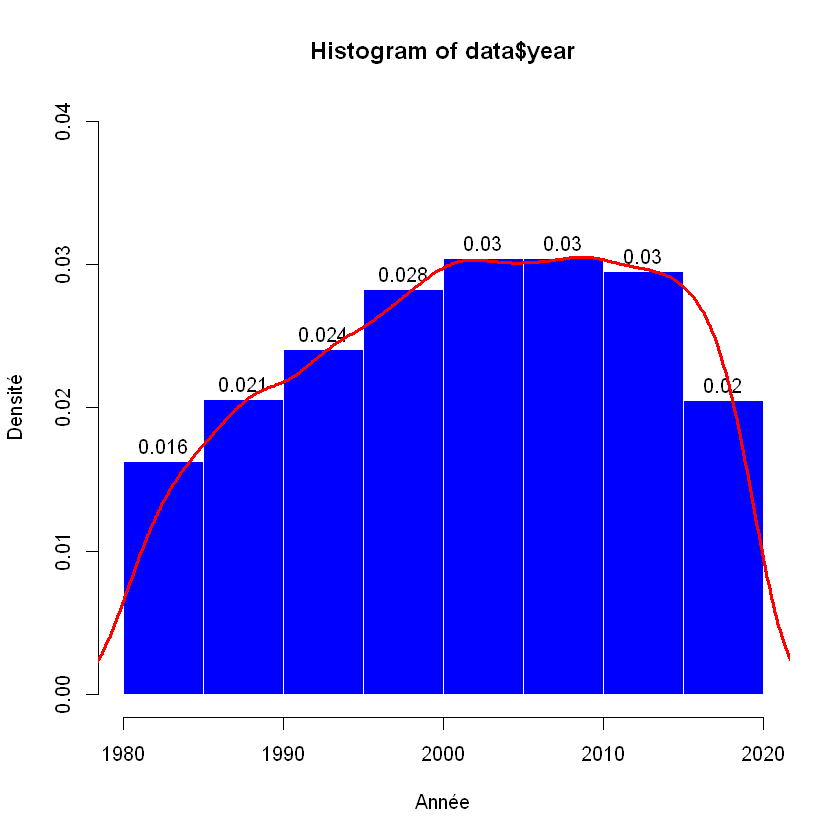

In [34]:
hist(data$year, col = "blue", border = "white", ylim = c(0, 0.0400), labels = TRUE, xlab = "Année", ylab = "Densité", freq = FALSE)
par(new = TRUE)
lines(density(data$year), lwd = 3, col = "red")

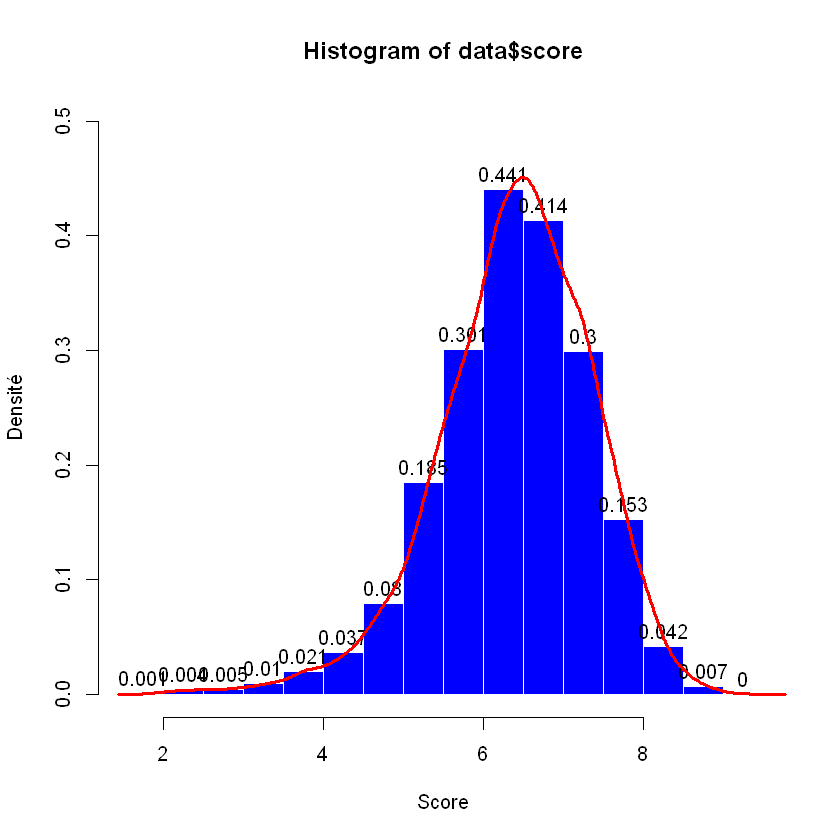

In [17]:
hist(data$score, col = "blue", border = "white", ylim = c(0, 0.5), labels = TRUE, xlab = "Score", ylab = "Densité", freq = FALSE)
par(new = TRUE)
lines(density(data$score), lwd = 3, col = "red")

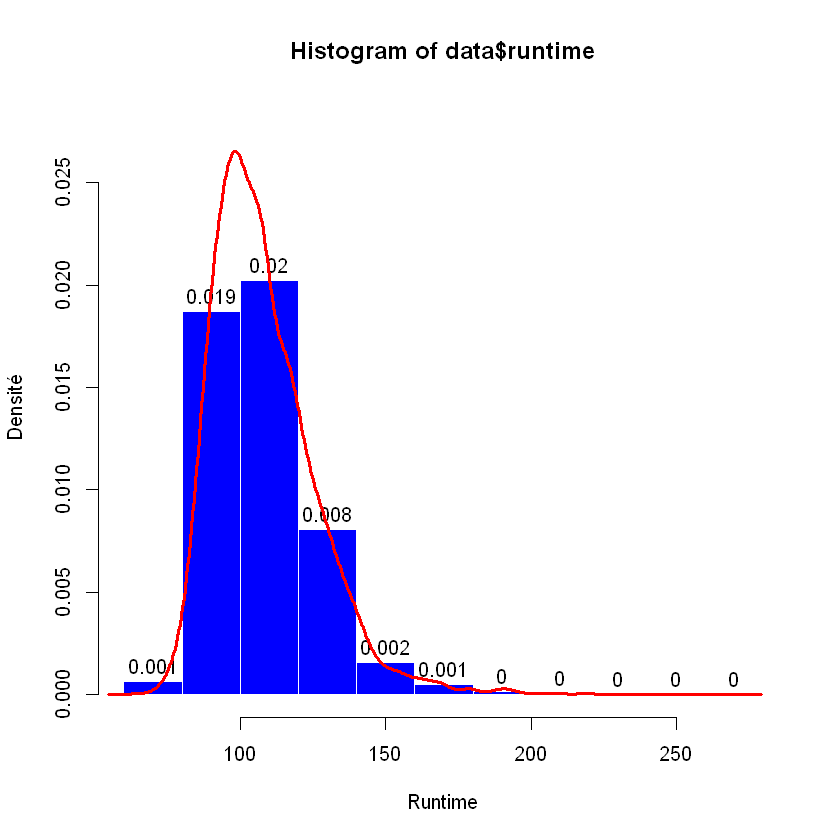

In [24]:
hist(data$runtime, col = "blue", border = "white", ylim = c(0, 0.028), labels = TRUE, xlab = "Runtime", ylab = "Densité", freq = FALSE)
par(new = TRUE)
lines(density(data$runtime), lwd = 3, col = "red")

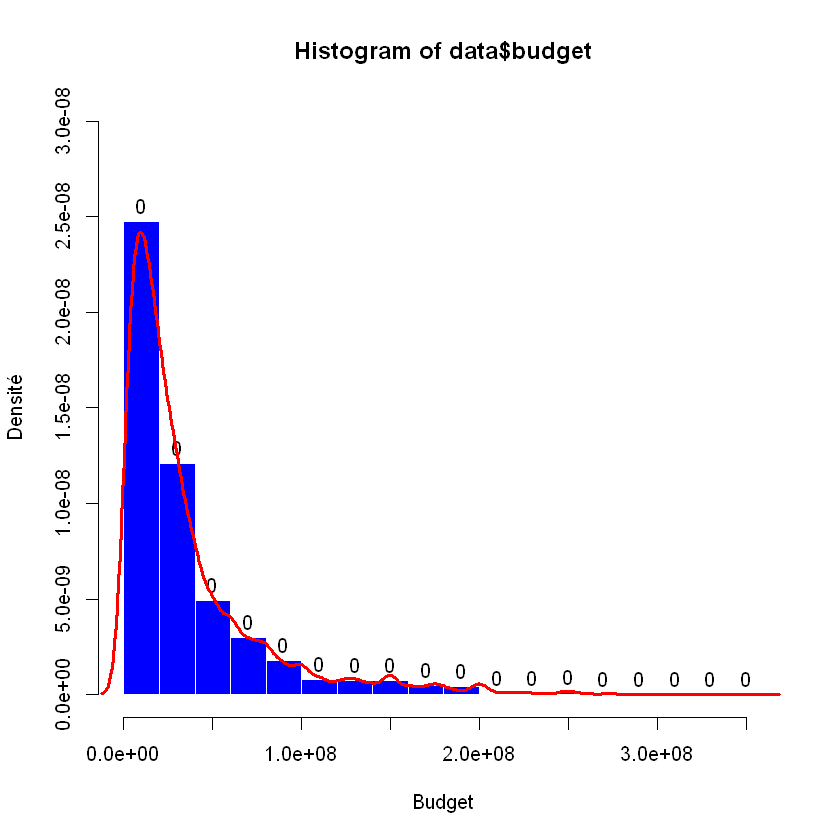

In [23]:
hist(data$budget, col = "blue", border = "white", ylim = c(0, 0.0000000300), labels = TRUE, xlab = "Budget", ylab = "Densité", freq = FALSE)
par(new = TRUE)
lines(density(data$budget), lwd = 3, col = "red")

Some of the numeric variables are skewed and need to be normalized.

In [43]:
# count the number of movies for each genre
count_genre <- table(data$genre)

# create a list of main genres
main_genres <- names(count_genre[count_genre > 20])

# replace any genre that has count < 20 with a new genre called 'Other'
data$genre <- as.character(data$genre)
data$genre[!(data$genre %in% main_genres)] <- "Other"
data$genre <- factor(data$genre, levels = c(main_genres, "Other"))

# print the normalized value counts of the genres
print(prop.table(table(data$genre)))

# create a pivot table of success vs. genre
table(data$success, data$genre)



     Action   Adventure   Animation   Biography      Comedy       Crime 
0.260533579 0.060165593 0.051149954 0.057405704 0.275252990 0.073597056 
      Drama     Fantasy      Horror       Other 
0.159889604 0.007727691 0.046734131 0.007543698 


   
    Action Adventure Animation Biography Comedy Crime Drama Fantasy Horror
  0    386       112        43       111    495   176   346      12     53
  1   1030       215       235       201   1001   224   523      30    201
   
    Other
  0    17
  1    24

In [44]:
q=(levels(factor(data$genre)))
q

[1] "Action"    "Adventure" "Animation" "Biography" "Comedy"    "Crime"    
 [7] "Drama"     "Fantasy"   "Horror"    "Other"

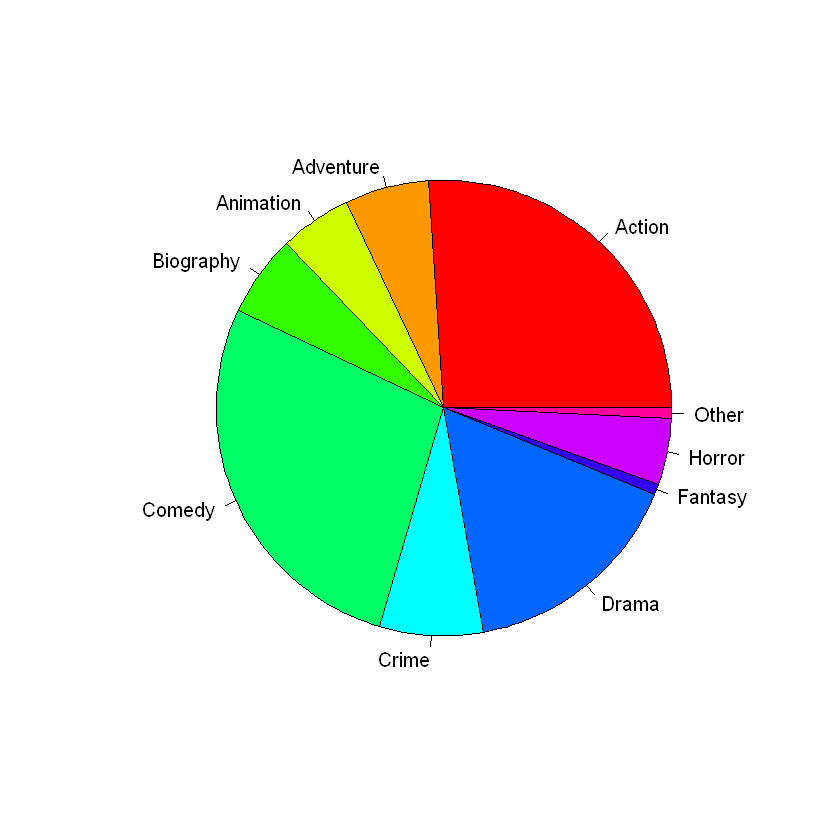

In [45]:
pie (table (data$genre), col = rainbow(length (q)))

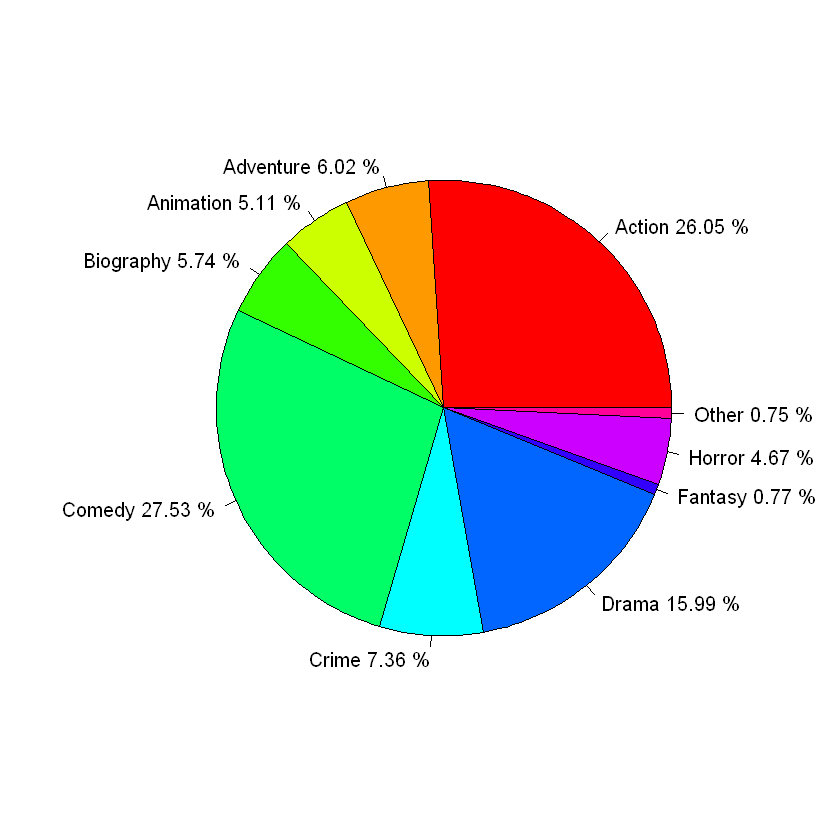

In [51]:
r <- c(table(factor(data$genre)))
prc <- round((r/nrow(data))*100, 2)
pie(table(data$genre), col = rainbow(length(q)),labels = paste(q, prc, "%"))

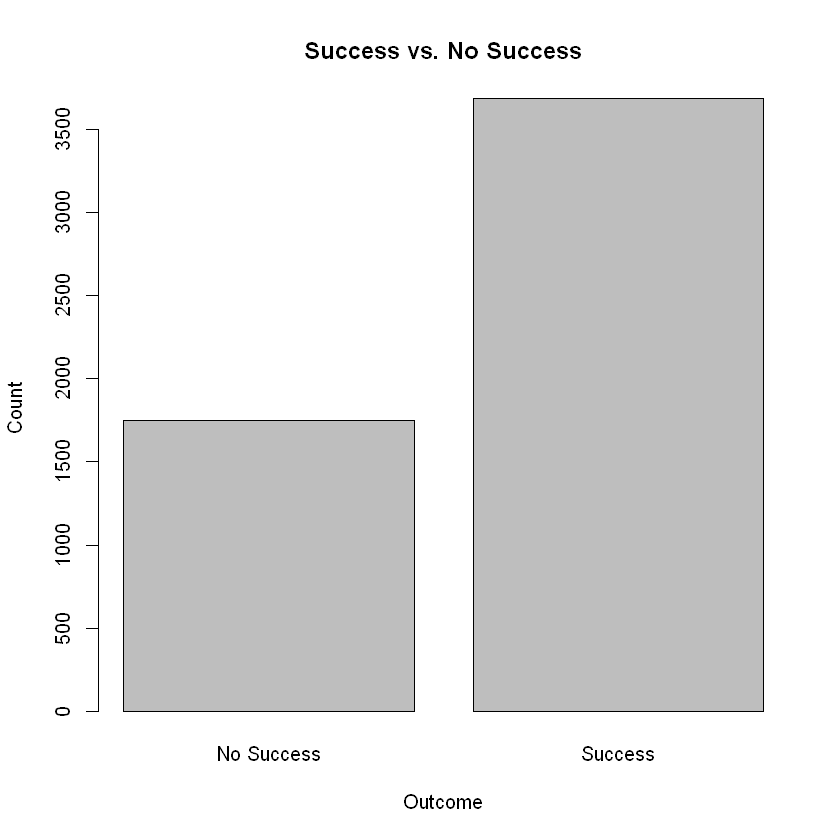

In [58]:
# Count the number of successes and failures
success_count <- table(data$success)

# Create a barplot with labels
barplot(success_count, 
        names.arg = c("No Success", "Success"), 
        main = "Success vs. No Success", 
        xlab = "Outcome", 
        ylab = "Count")


# Relation entre des variables quantitatives

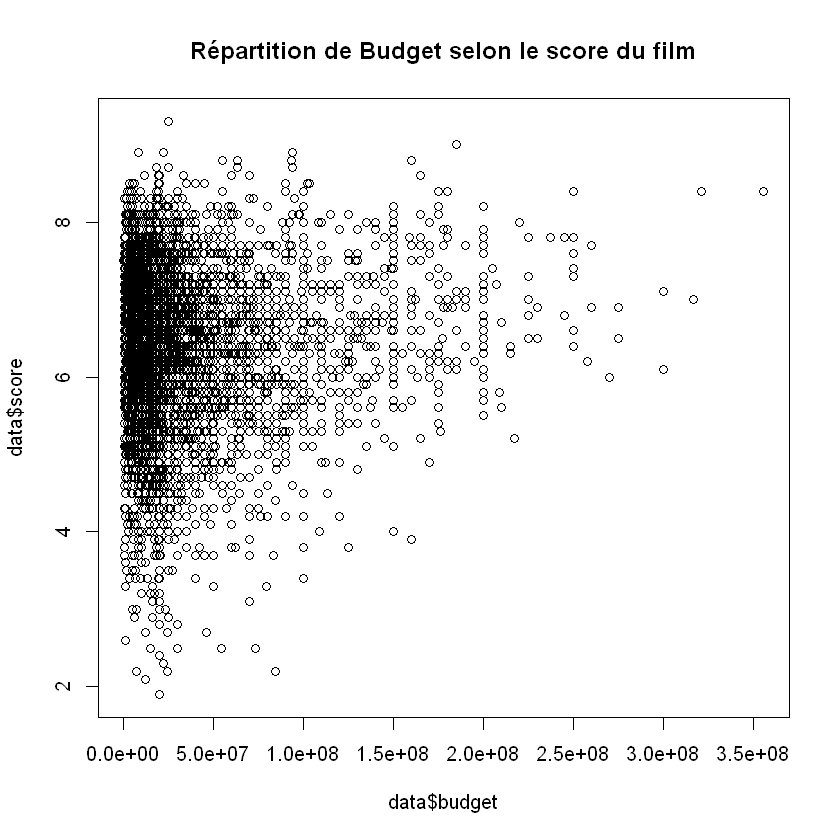

In [61]:
plot(x=data$budget, y=data$score,main="Répartition de Budget selon le score du film")

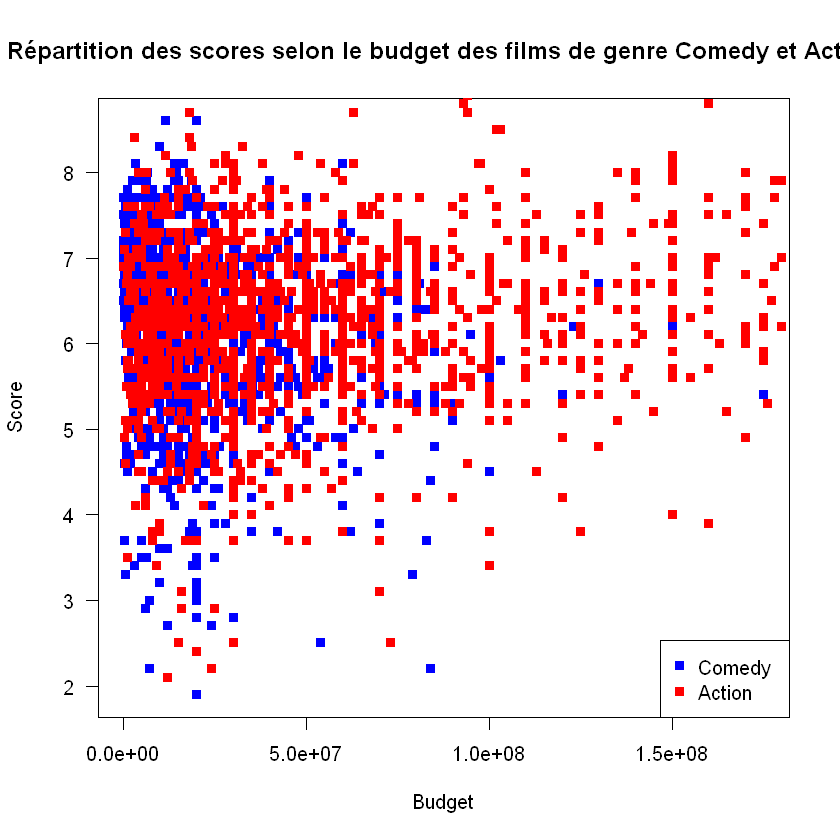

In [63]:
plot (data$budget[data$genre=="Comedy"],
data$score[data$genre=="Comedy"], pch=15, col="blue",
main="Répartition des scores selon le budget des films de genre Comedy et Action", xlab="Budget",
ylab="Score", las=1)

points (data$budget[data$genre=="Action"],
data$score[data$genre=="Action"], pch=15, col="red")

legend (x="bottomright", legend=c("Comedy","Action"),
col=c("blue","red"), pch=15)

In [64]:
cor(data$budget, data$gross, use = "complete.obs")

[1] 0.74041

integer(0)


Call:
lm(formula = data$budget ~ data$gross)

Residuals:
       Min         1Q     Median         3Q        Max 
-250126956  -15025341   -6207492    8992879  191397187 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.900e+07  4.325e+05   43.93   <2e-16 ***
data$gross  1.644e-01  2.025e-03   81.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27930000 on 5433 degrees of freedom
Multiple R-squared:  0.5482,	Adjusted R-squared:  0.5481 
F-statistic:  6592 on 1 and 5433 DF,  p-value: < 2.2e-16


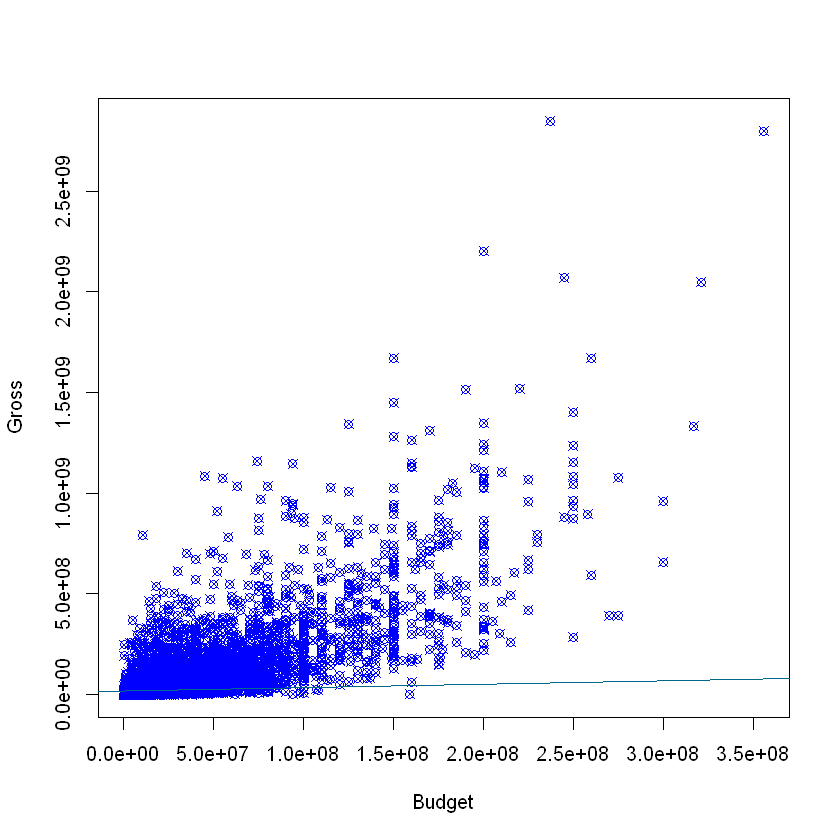

In [65]:
reg= lm(data$budget ~ data$gross)
plot (data$budget, data$gross, xlab="Budget",ylab="Gross", pch=13, col="blue")+abline(reg, col = "deepskyblue4")
summary(reg)

Le résultat montre que les coefficients de détermination (R2) sont significativement différents de 0. Le nombre d’heures passées devant la télévision augmente donc avec celle des enfants,ce qui est cohérent avec les résultats précédents.

In [66]:
t.test(data$score)


	One Sample t-test

data:  data$score
t = 489.32, df = 5434, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.367230 6.418455
sample estimates:
mean of x 
 6.392843 


Le score moyen des films étudiés s’avère être de 6.392843, avec un intervalle de confiance à 95 % de [6.367230, 6.418455].

In [73]:
library (FactoMineR)
library (factoextra)
library (corrplot)

In [79]:
res.pca = PCA(data[data$genre=="Comedy", c(4, 6, 7, 12, 13, 15)],scale.unit = TRUE, ncp = 6, graph = TRUE)

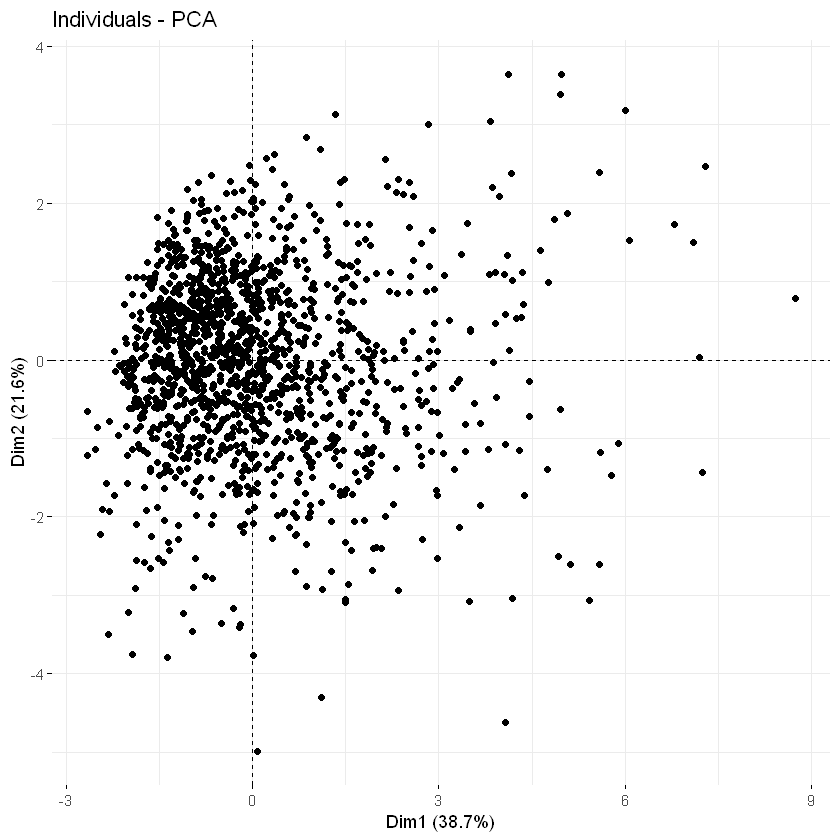

In [80]:
# visualize PCA results
fviz_pca_ind(res.pca, label = "none")

In [82]:
var = get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

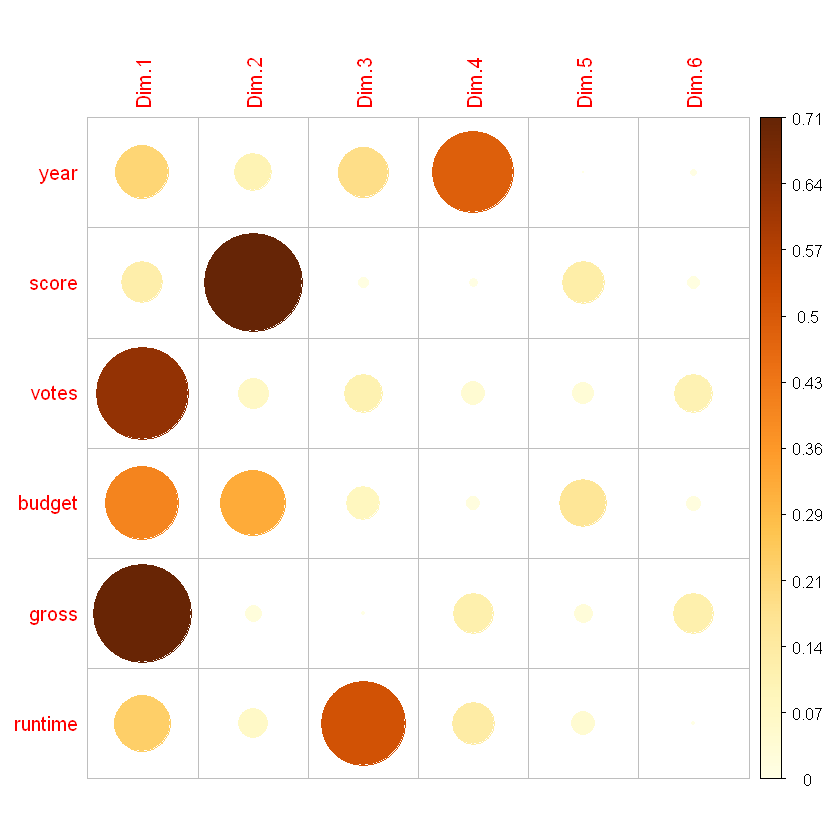

In [83]:
corrplot(var$cos2, is.corr=FALSE)

# Relation entre des variables qualitatives

In [89]:
# count the number of movies for each genre
count_country <- table(data$country)

# create a list of main genres
main_countries <- names(count_country[count_country > 25])

# replace any genre that has count < 25 with a new genre called 'Other'
data$country <- as.character(data$country)
data$country[!(data$country %in% main_countries)] <- "Others"
data$country <- factor(data$country, levels = c(main_countries, "Others"))

# print the normalized value counts of the genres
print(prop.table(table(data$country)))

# create a pivot table of success vs. genre
table(data$success, data$country)



     Australia         Canada          China         France        Germany 
   0.007727691    0.020423183    0.004783809    0.019319227    0.015087397 
         Japan United Kingdom  United States         Others 
   0.005703772    0.090892364    0.795768169    0.040294388 


   
    Australia Canada China France Germany Japan United Kingdom United States
  0        15     57     3     49      40    10            197          1303
  1        27     54    23     56      42    21            297          3022
   
    Others
  0     77
  1    142

In [90]:
t=table (data$genre, data$country)
t

           
            Australia Canada China France Germany Japan United Kingdom
  Action           13     20    14     31      23     9            104
  Adventure         3      5     3      6       8     0             61
  Animation         2      7     2      7       2    14             15
  Biography         6      4     2      5       7     2             66
  Comedy            4     19     1     15      21     1             91
  Crime             1     12     0     11       6     1             34
  Drama             8     26     4     25      15     2            100
  Fantasy           1      3     0      1       0     0              1
  Horror            4     15     0      2       0     2             16
  Other             0      0     0      2       0     0              6
           
            United States Others
  Action             1149     53
  Adventure           229     12
  Animation           214     15
  Biography           206     14
  Comedy             1313     

In [91]:
prop.table (t)

           
               Australia       Canada        China       France      Germany
  Action    0.0023919043 0.0036798528 0.0025758970 0.0057037718 0.0042318307
  Adventure 0.0005519779 0.0009199632 0.0005519779 0.0011039558 0.0014719411
  Animation 0.0003679853 0.0012879485 0.0003679853 0.0012879485 0.0003679853
  Biography 0.0011039558 0.0007359706 0.0003679853 0.0009199632 0.0012879485
  Comedy    0.0007359706 0.0034958602 0.0001839926 0.0027598896 0.0038638454
  Crime     0.0001839926 0.0022079117 0.0000000000 0.0020239190 0.0011039558
  Drama     0.0014719411 0.0047838086 0.0007359706 0.0045998160 0.0027598896
  Fantasy   0.0001839926 0.0005519779 0.0000000000 0.0001839926 0.0000000000
  Horror    0.0007359706 0.0027598896 0.0000000000 0.0003679853 0.0000000000
  Other     0.0000000000 0.0000000000 0.0000000000 0.0003679853 0.0000000000
           
                   Japan United Kingdom United States       Others
  Action    0.0016559338   0.0191352346  0.2114075437 0.009751

Le test khi2 admet les deux hypothèses suivantes :

 H0 : Les deux observations sont indépendantes ;
 
 H1 : Les deux observations sont liées.

In [93]:
chisq.test(data$genre, data$country)

Warning message in chisq.test(data$genre, data$country):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  data$genre and data$country
X-squared = 393.26, df = 72, p-value < 2.2e-16


En l’occurrence p-value est inférieure à 2.2*10-16 ; on rejette donc largement l’hypothèse
d’indépendance. On peut donc affirmer qu’il existe un lien statistique entre les deux
variables observées.

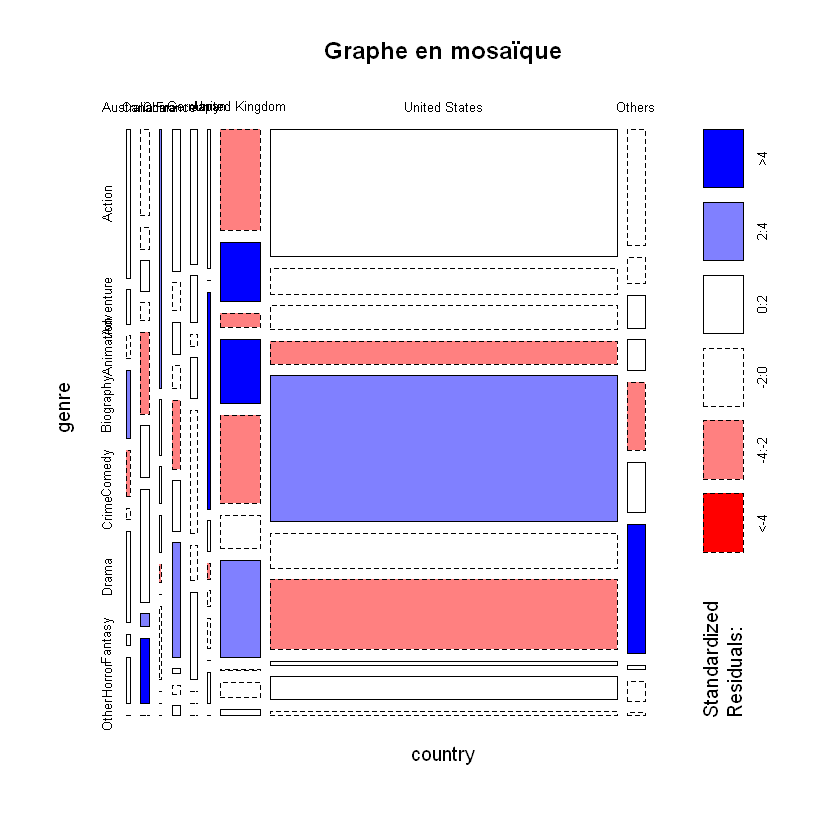

In [95]:
mosaicplot(country ~ genre, data = data, shade = TRUE, main
="Graphe en mosaïque")

# Relation entre variables quantitatives et qualitatives

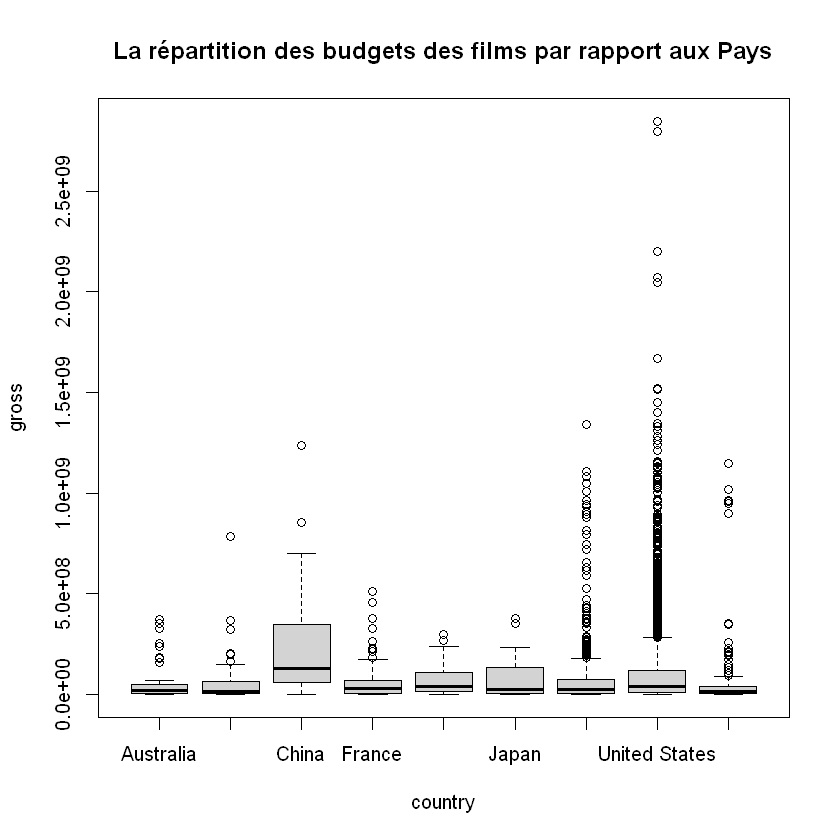

In [102]:
boxplot (gross ~ country, data = data,main="La répartition des budgets des films par rapport aux Pays")

In [103]:
anov= aov(budget ~country, data)
summary (anov)

              Df    Sum Sq   Mean Sq F value   Pr(>F)    
country        8 1.277e+17 1.596e+16   9.357 6.56e-13 ***
Residuals   5426 9.254e+18 1.706e+15                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

On remarque que la p-value est inférieure à 0,001 on rejette donc l’hypothèse nulle qui est
« les moyennes de la variable quantitative sont toutes égales entre les groupes ».